In [46]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import cm


In [47]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## Analisis
Es diferente y=fruits["fruit_label"] a y=fruits[["fruit_label"]], el segundo data un dataframe, el primero es una serie.

In [48]:
#X=fruits[["height","width","mass","color_score"]]
#X_train = X_train[['height','width', 'height']]
##cuando agrego mass tiene menos precisión
X=fruits[['height','width', 'mass']]
y=fruits["fruit_label"]
print (y.values)

[1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


In [49]:
##75 - 25
## Divido entranamiento y prueba
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state=0)
##?train_test_split

In [50]:
print("X train "+ str(X_train.shape))
print("X_test" + str(X_test.shape))

X train (44, 3)
X_test(15, 3)


In [51]:
look_up_name=dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))
look_up_name
fruits.fruit_label.unique()
fruits.fruit_name.unique()
fruits.describe()



,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


Outliers

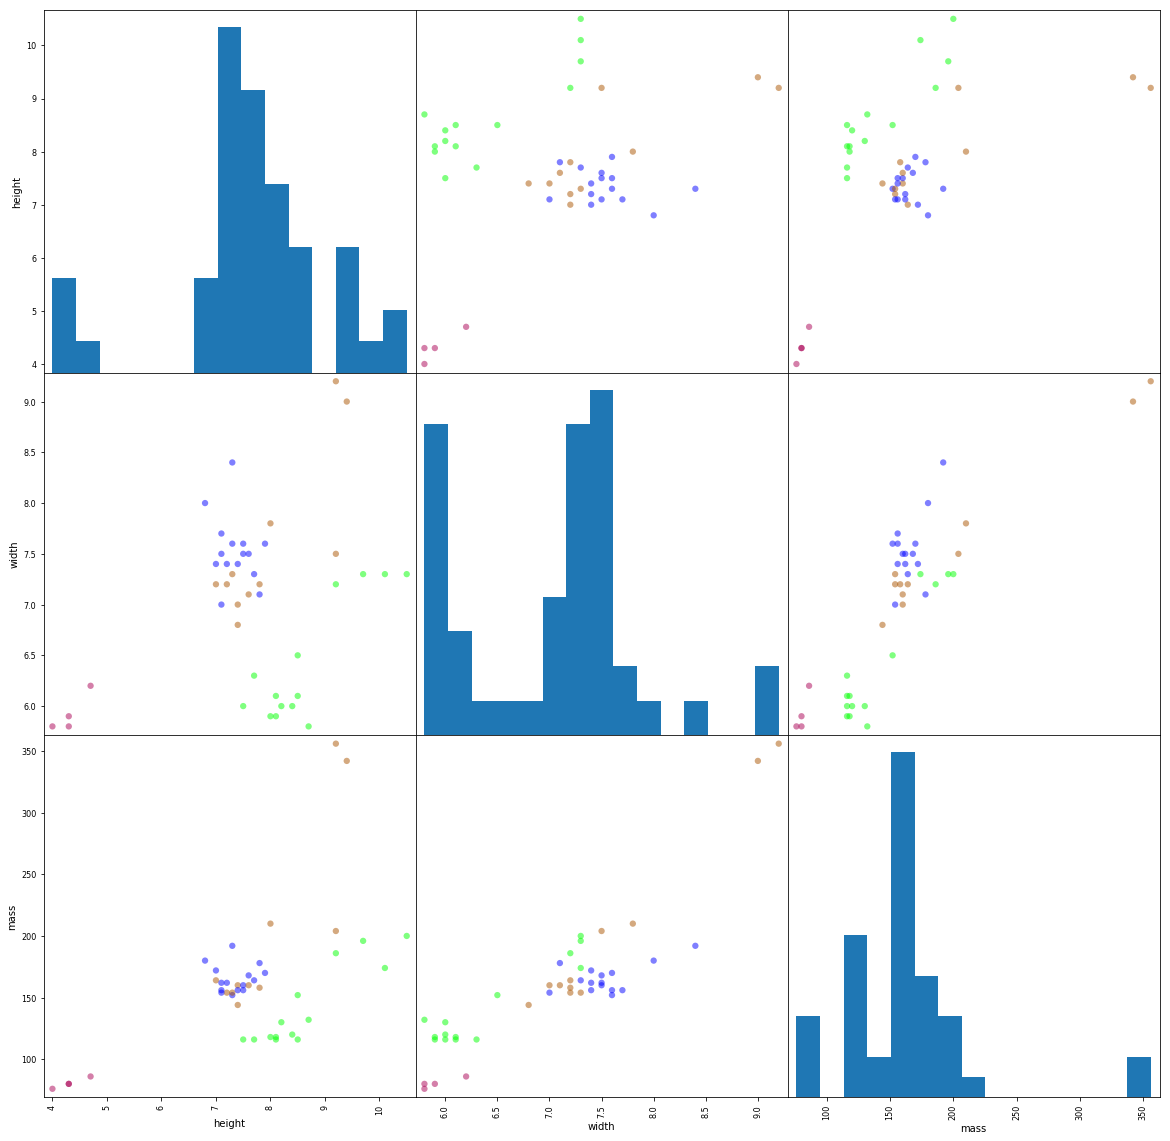

In [100]:
##https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame
##%matplotlib inline
##y_train.plot(legend=True)

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train,c=y_train,marker='o',s=40, figsize=(20, 20),hist_kwds={'bins':15},cmap='brg')

### KN
* K, impar odd
* distancia
* cuantos
* pesos
* votos

Knn.score(X_test,y_test), la fracción de los que fueron correctos
k=1, no smother, no regularization

    nume     score   weights
7      4  0.733333  distance
19    10  0.666667  distance
13     7  0.666667  distance
35    18  0.666667  distance
33    17  0.666667  distance
31    16  0.666667  distance
29    15  0.666667  distance
27    14  0.666667  distance
25    13  0.666667  distance
23    12  0.666667  distance
21    11  0.666667  distance
17     9  0.666667  distance
15     8  0.666667  distance
37    19  0.666667  distance
5      3  0.666667  distance
0      1  0.600000   uniform
11     6  0.600000  distance
1      1  0.600000  distance
3      2  0.600000  distance
9      5  0.600000  distance
6      4  0.533333   uniform
16     9  0.533333   uniform
2      2  0.533333   uniform
10     6  0.533333   uniform
4      3  0.533333   uniform
8      5  0.533333   uniform
12     7  0.533333   uniform
14     8  0.466667   uniform
22    12  0.333333   uniform
20    11  0.333333   uniform
18    10  0.333333   uniform
26    14  0.333333   uniform
28    15  0.266667   uniform
24    13  0.26

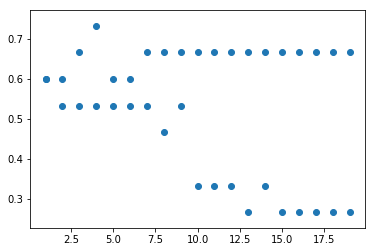

In [99]:
# trabajando con data faltante
from sklearn.neighbors import KNeighborsClassifier
aux_dict = {}
aux_list =[]
for nume in range(1,20):
    for weights in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=nume,weights=weights)
        knn.fit(X_train,y_train)
        aux_dict={'nume': nume, 'weights': weights, 'score':knn.score(X_test,y_test)}
        aux_list.append(aux_dict)
        #print (str(nume)+' '+str(weights)+' '+str(knn.score(X_test,y_test))) 
aux_DataFrame=pd.DataFrame(aux_list).sort_values(by='score', ascending = False)
print (aux_DataFrame)

plt.figure()
plt.scatter(aux_DataFrame.nume, aux_DataFrame.score)
plt.show()

In [81]:
fruit_prediction = knn.predict(X_train)
X_train_c = X_train.copy()
X_train_c['real'] = y_train
X_train_c['predic'] = fruit_prediction
print (X_train_c)

    height  width  mass  real  predic
42     7.2    7.2   154     3       1
48    10.1    7.3   174     4       1
7      4.0    5.8    76     2       2
14     7.3    7.6   152     1       1
32     7.0    7.2   164     3       1
49     8.7    5.8   132     4       4
29     7.4    7.0   160     3       3
37     7.3    7.3   154     3       1
56     8.1    5.9   116     4       4
18     7.1    7.5   162     1       1
55     7.7    6.3   116     4       4
27     9.2    7.5   204     3       3
15     7.1    7.7   156     1       1
5      4.3    5.8    80     2       2
31     8.0    7.8   210     3       3
16     7.5    7.6   156     1       1
50     8.2    6.0   130     4       4
20     7.5    7.5   160     1       1
51     7.5    6.0   116     4       4
8      7.8    7.1   178     1       1
13     7.7    7.3   164     1       1
25     9.2    9.2   356     3       3
17     7.6    7.5   168     1       1
58     8.1    6.1   118     4       4
57     8.5    6.5   152     4       1
52     8.0  